In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('MostSubscribers.xlsx')

In [3]:
print('Shape of dataframe:', df.shape)

Shape of dataframe: (50, 6)


In [4]:
print('\nFirst 5 rows of dataframe:\n', df.head())


First 5 rows of dataframe:
    Rank                     Channel  Subscribers(millions) Language  \
0     1                    T-Series                  193.0    Hindi   
1     2  Cocomelon - Nursery Rhymes                  118.0  English   
2     3                   SET India                  115.0    Hindi   
3     4                   PewDiePie                  110.0  English   
4     5             Kids Diana Show                   83.5  English   

        Category         Country  
0          Music           India  
1      Education   United States  
2  Entertainment           India  
3         Gaming          Sweden  
4           Film         Ukraine  


In [5]:
print('\nData types and non-null values of columns:\n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   50 non-null     int64  
 1   Channel                50 non-null     object 
 2   Subscribers(millions)  50 non-null     float64
 3   Language               50 non-null     object 
 4   Category               50 non-null     object 
 5   Country                50 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB

Data types and non-null values of columns:
 None


In [6]:
print('\nSummary statistics of numerical columns:\n', df.describe())


Summary statistics of numerical columns:
            Rank  Subscribers(millions)
count  50.00000              50.000000
mean   25.50000              59.918000
std    14.57738              26.828097
min     1.00000              40.000000
25%    13.25000              43.875000
50%    25.50000              50.600000
75%    37.75000              65.175000
max    50.00000             193.000000


In [7]:
df = df.rename(columns={
    'Rank': 'Ranking',
    'Channel': 'Account',
    'Subscribers(millions)': 'Subscribers',
    'Language': 'Language',
    'Category': 'Category',
    'Country': 'Country'
})

print(df.columns)

Index(['Ranking', 'Account', 'Subscribers', 'Language', 'Category', 'Country'], dtype='object')


In [8]:
grouped_df = df.groupby(['Category', 'Country'])['Subscribers'].agg(['count', 'mean', 'median', 'std'])
print(grouped_df)

                               count        mean  median        std
Category      Country                                              
Comedy         Brazil              1   43.000000   43.00        NaN
Education      India               1   51.500000   51.50        NaN
               South Korea         1   52.000000   52.00        NaN
               United States       1  118.000000  118.00        NaN
Entertainment  Brazil              2   42.150000   42.15   1.060660
               Chile               2   43.450000   43.45   0.919239
               Cyprus              1   41.900000   41.90        NaN
               India               4   69.125000   58.35  31.250960
               Mexico              1   44.800000   44.80        NaN
               Russia              2   74.550000   74.55   3.181981
               Spain               1   40.000000   40.00        NaN
               United States       1   69.800000   69.80        NaN
Film           India               1   58.800000

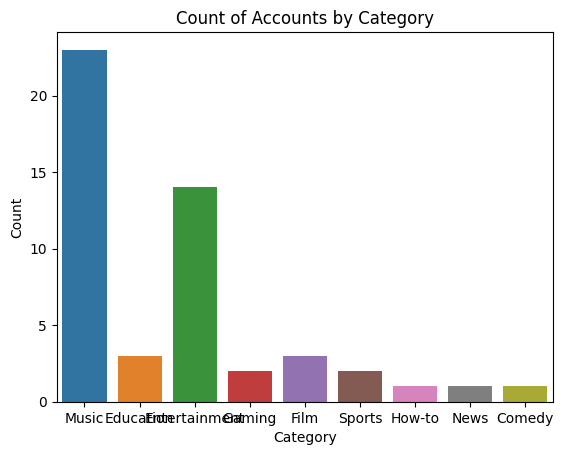

In [9]:
# Create a countplot of the 'Category' column
sns.countplot(x='Category', data=df)
plt.title('Count of Accounts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

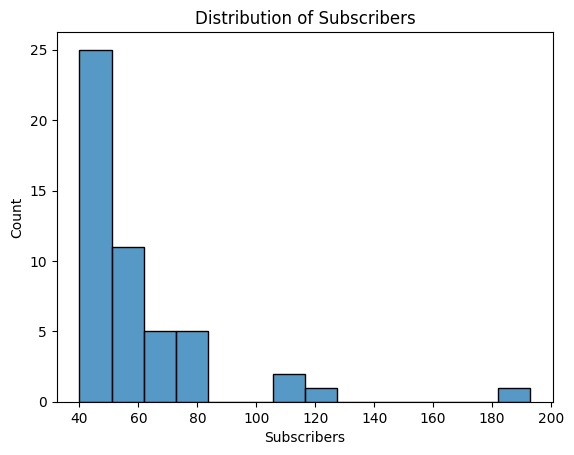

In [10]:
sns.histplot(data=df, x='Subscribers')
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Count')
plt.show()

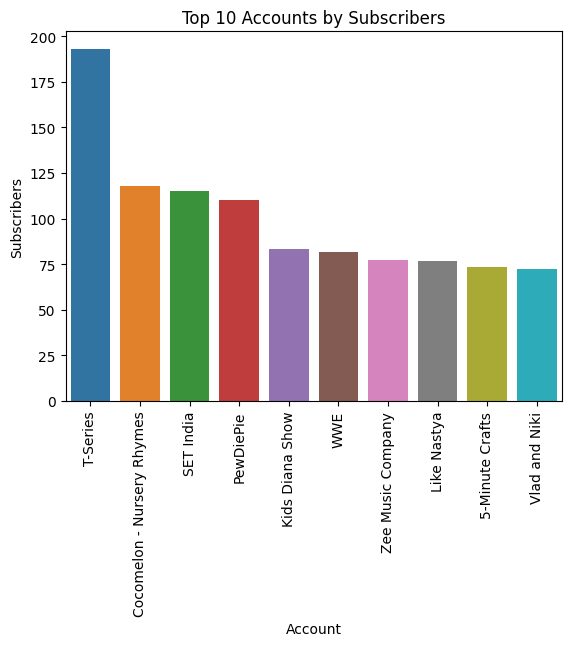

In [11]:
top_10 = df.sort_values(by='Subscribers', ascending=False).head(10)
sns.barplot(x='Account', y='Subscribers', data=top_10)
plt.title('Top 10 Accounts by Subscribers')
plt.xlabel('Account')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

In [12]:
print(df['Subscribers'].describe())

count     50.000000
mean      59.918000
std       26.828097
min       40.000000
25%       43.875000
50%       50.600000
75%       65.175000
max      193.000000
Name: Subscribers, dtype: float64


In [13]:
# Hypothesis test to compare mean number of subscribers
top_10 = df.sort_values(by='Subscribers', ascending=False).head(10)
rest = df.sort_values(by='Subscribers', ascending=False).tail(40)
t_stat, p_val = stats.ttest_ind(top_10['Subscribers'], rest['Subscribers'])
print('T-statistic: {:.2f}, p-value: {:.4f}'.format(t_stat, p_val))

T-statistic: 8.02, p-value: 0.0000


In [14]:
# Correlation between number of subscribers and ranking
corr, p_val = stats.spearmanr(df['Ranking'], df['Subscribers'])
print('Spearman correlation coefficient: {:.2f}, p-value: {:.4f}'.format(corr, p_val))

Spearman correlation coefficient: -1.00, p-value: 0.0000


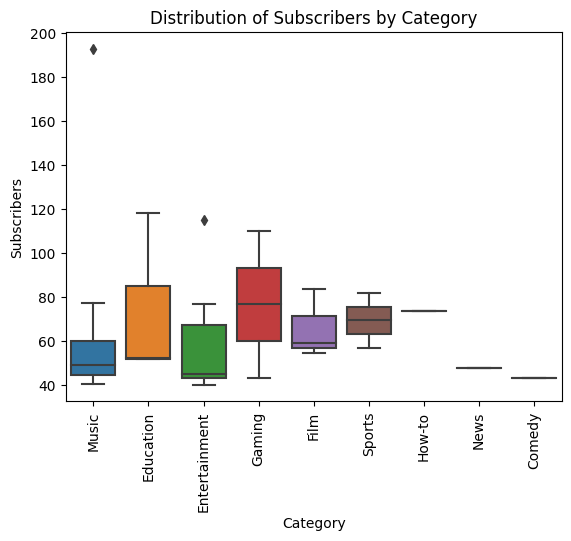

In [15]:
# Box plot of subscribers by category
sns.boxplot(x='Category', y='Subscribers', data=df)
plt.title('Distribution of Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

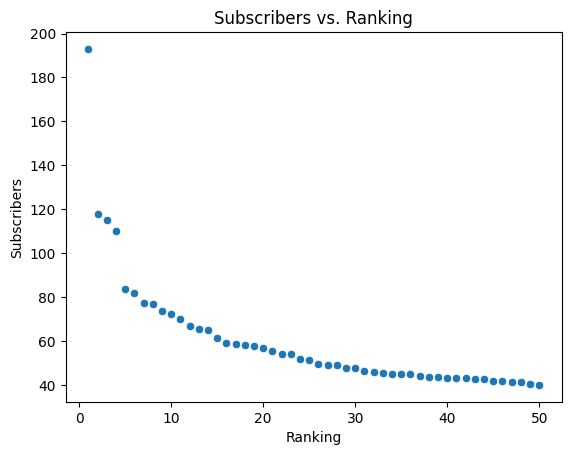

In [16]:
# Scatter plot of subscribers and ranking
sns.scatterplot(x='Ranking', y='Subscribers', data=df)
plt.title('Subscribers vs. Ranking')
plt.xlabel('Ranking')
plt.ylabel('Subscribers')
plt.show()

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Ranking'], df['Subscribers'], test_size=0.2, random_state=42)

In [18]:
# Fit linear regression model on training data
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

In [19]:
# Predict number of subscribers on test data
y_pred = reg.predict(X_test.values.reshape(-1, 1))

In [20]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))

Mean squared error: 108.13


In [21]:
X_fake, y_fake = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

In [22]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake, y_fake, test_size=0.2, random_state=42)

In [23]:
lr_fake = LinearRegression()
lr_fake.fit(X_fake_train, y_fake_train)

LinearRegression()

In [24]:
y_fake_pred = lr_fake.predict(X_fake_test)

In [25]:
mse_fake = mean_squared_error(y_fake_test, y_fake_pred)
print("Mean squared error on fake data: {:.2f}".format(mse_fake))

Mean squared error on fake data: 416.81


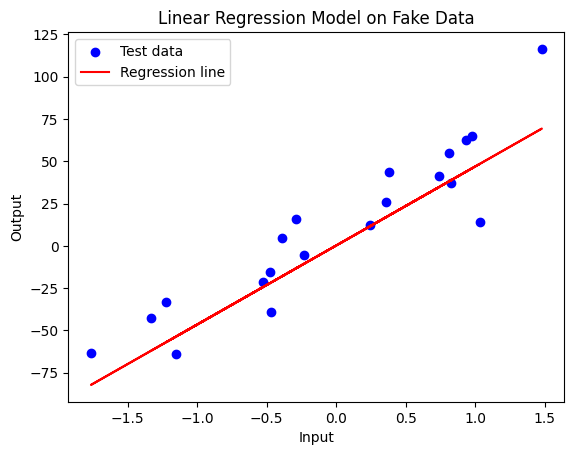

In [26]:
plt.scatter(X_fake_test, y_fake_test, color='blue', label='Test data')
plt.plot(X_fake_test, y_fake_pred, color='red', label='Regression line')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Model on Fake Data')
plt.legend()
plt.show()

In [27]:
X = df[['Subscribers']].values

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
n_clusters = 10

In [35]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [36]:
kmeans.fit(X_scaled)

C:\Users\nehac\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [37]:
df['Cluster'] = kmeans.labels_

In [38]:
for i in range(n_clusters):
    print('Cluster', i)
    print(df[df['Cluster'] == i]['Subscribers'].describe())
    print()

Cluster 0
count     6.000000
mean     58.683333
std       1.650959
min      56.700000
25%      57.725000
50%      58.600000
75%      59.100000
max      61.500000
Name: Subscribers, dtype: float64

Cluster 1
count      2.00000
mean     116.50000
std        2.12132
min      115.00000
25%      115.75000
50%      116.50000
75%      117.25000
max      118.00000
Name: Subscribers, dtype: float64

Cluster 2
count      1.0
mean     193.0
std        NaN
min      193.0
25%      193.0
50%      193.0
75%      193.0
max      193.0
Name: Subscribers, dtype: float64

Cluster 3
count    17.000000
mean     42.829412
std       1.506139
min      40.000000
25%      41.900000
50%      43.000000
75%      43.800000
max      45.200000
Name: Subscribers, dtype: float64

Cluster 4
count     2.000000
mean     82.650000
std       1.202082
min      81.800000
25%      82.225000
50%      82.650000
75%      83.075000
max      83.500000
Name: Subscribers, dtype: float64

Cluster 5
count     4.000000
mean     66.725000